### Часть 1. Модель хищник-жертва

Рассмотрим уравнения Лотки — Вольтерры для динамики популяции хищников и животных-жертв (классический пример системы ОДУ). Уравнения следующие: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, где $x(t)$ - количество животных - жертв, а $y(t)$ - количество животных-хищников. Коэффициенты a, b, c и d описывают скорость процессов в модели. Например, $a$ - это скорость, с которой рождаются хищные животные, а $d$ - скорость, с которой хищные животные умирают. Коэффициенты $b$ и $c$ - это скорость, с которой хищники поедают добычу, и скорость, с которой популяция хищников растет за счет популяции жертвы, соответственно. Обратите внимание, что это нелинейная система ОДУ из-за членов $xy$.

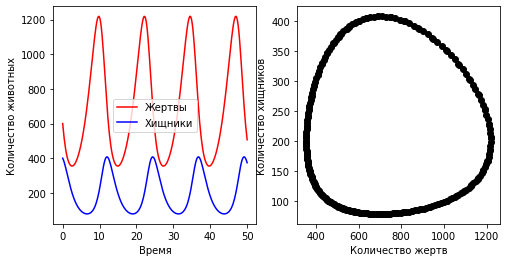

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
# сетка
t = np.linspace(0, 50, 250)
# решение пакетным методом
xy_t = integrate.odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")
plt.savefig('600_400_50_250.png')

Слева - график зависимости популяции от времени, справа - фазовое пространство.

Задание: 

Сколько узлов сетки достаточно для адекватного разрешения физики задачи? От чего это зависит? Как понять, сколько узлов задавать? 

Желательно провести исследование не только в текущей постановке задачи, но и в зависимости от параметров модели и начальных условий.

$\textbf{Ответ:}$ для описанной модели Вольтерра вывел 3 закона: 

1.  $\textbf{Закон периодического цикла.}$ Процесс уничтожения жертвы хищником нередко приводит к периодическим колебаниям численности популяций обоих видов, зависящим только от скорости роста популяций хищника и жертвы и от исходного соотношения их численностей.
2. $\textbf{Закон сохранения средних величин.}$ Средняя численность популяции каждого вида постоянна, независимо от начального уровня, при условии, что специфические скорости увеличения численности популяций, а также эффективность хищничества постоянны.
3. $\textbf{Закон нарушения средних величин.}$ При аналогичном нарушении популяций хищника и жертвы средняя численность популяции жертвы растет, а популяции хищника — падает.

Из них можно сделать такие выводы:

1. Фазовые кривые системы уравнений Лотки-Вольтерра замкнуты.
2. Численность популяций хищников и жертв меняется периодически.
3. Период колебаний зависит от начальной численности популяций и коэффициентов системы.
4. Средняя численность популяции не зависит от начального значения, но зависит от коэффициентов системы.

Есть два подхода для определения "достаточно адекватного разрешения физики задачи". Первый - мы наблюдаем на 1-ом графике периодичность, а на 2-ом очертания замкнутой элипсовидной фигуры. Второй - график выглядит достаточно гладким, а фазовая кривая замкнута. В первом случае количество узлов системы зависит только количества колебаний (влезших периодов) за заданное время, а период колебаний зависит от начальной численности популяций и коэффициентов системы. Те, задав n  точек для одного периода - мы будем знать, сколько надо точек для m периодов - $m \cdot n$. Во втором случае - важна степень сходимости метода, ошибки (метода, округления), ну и также период. Чтобы узнать необходимое количество узлов, задаем максимально допустимую ошибку в промежуточных узлах и пока в нее не уложимся - увеличиваем количество узлов.


### Часть 2. Метод высокого порядка

Задание: 
1. выписать расчетные формулы для задачи из Части 1 и реализовать метод РК первого и третьего порядка (не в общем для любой задачи Коши, а для конкретной из Части 1)
2. решить задачу этими методами в изначальной постановке. Сравнить решение с решением с помощью odeint. Оценить влияние точности метода на решение

$ \textbf{Ответ:} \\$
$\textbf{Метод РК первого порядка:} \\$
Рассчетные формулы:
$$\textbf{k1} = (k_{11},k_{12})^T = \textbf{f}(t_n,\textbf{u}_n) = (ax_n-bx_ny_n,cx_ny_n-dy_n)^T $$
$$\textbf{u}_{n+1} = \textbf{u}_{n} +h\textbf{k}_1$$

In [50]:
def RK1(xy_vec0, t):
    un = []
    un.append(xy_vec0)
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        k1 = np.array(f(un[i], t[i]))
        un1 = un[i] + h*k1
        un.append([un1[0], un1[1]])
    return un

Text(0, 0.5, 'Количество хищников')

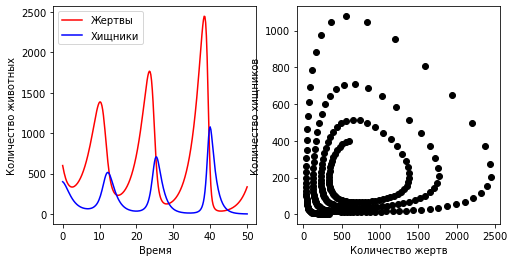

In [51]:
un1 = RK1(xy_vec0, t)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, np.array(un1)[:,0], 'r', label="Жертвы")
axes[0].plot(t, np.array(un1)[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(np.array(un1)[:,0], np.array(un1)[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

$\textbf{Метод РК первого порядка:} \\$
Рассчетные формулы:
$$\textbf{k}_1 = (k_{11},k_{12})^T = \textbf{f}(t_n,\textbf{u}_n) = (ax_n-bx_ny_n,cx_ny_n-dy_n)^T $$
$$\textbf{k}_2 = (k_{21},k_{22})^T = \textbf{f}(t_n+\frac{h}{2},\textbf{u}_n +\frac{h}{2} \textbf{k}_{1}) $$
$$\textbf{k}_3 = (k_{31},k_{32})^T = \textbf{f}(t_n+h,\textbf{u}_n -h\textbf{k}_{1}+2h\textbf{k}_2) $$
$$\textbf{u}_{n+1} = \textbf{u}_{n} +\frac{h}{6}(\textbf{k}_1+4\textbf{k}_2+\textbf{k}_3)$$

In [48]:
def RK3(xy_vec0, t):
    un = []
    un.append(xy_vec0)
    for i in range(len(t) -1):
        h = t[i+1] - t[i]
        k1 = np.array(f(un[i], t[i]))
        k2 = np.array(f(un[i] +k1*h/2, t[i] + h/2))
        k3 = np.array(f(un[i] +h*(-k1 +2*k2), t[i] +h))
        un1 = un[i] + h*(k1+4*k2+k3)/6
        un.append([un1[0], un1[1]])
    return un

Text(0, 0.5, 'Количество хищников')

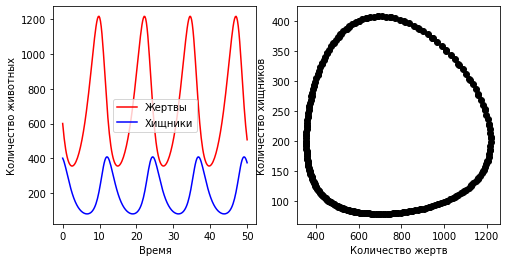

In [49]:

un3 = RK3(xy_vec0, t)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, np.array(un3)[:,0], 'r', label="Жертвы")
axes[0].plot(t, np.array(un3)[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(np.array(un3)[:,0], np.array(un3)[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")


Оценив результат полученный с помощью метода Рунге-Кутты 1 и 3 порядков и odeint можно сделать вывод, что метод 1-го порядка имеет плохую точность, а вот метод 3 порядка такой же как odeint.

### Часть 3. Порядок точности метода

Найти численно и построить графики порядка методов из предыдущей части в зависимости от шага сетки в широком диапазоне шага. Объяснить, что мы видим на рисунке. 

In [78]:
def err(h):
    t = np.arange(0, 50, h)
    xy_t = integrate.odeint(f, xy_vec0, t)
    un1 = np.array(RK1(xy_vec0, t))
    un3 = np.array(RK3(xy_vec0, t))
    er_RK1 = [max(abs(xy_t[:,0] - un1[:, 0])), max(abs(xy_t[:,1] - un1[:, 1]))]
    er_RK3 = [max(abs(xy_t[:,0] - un3[:, 0])), max(abs(xy_t[:,1] - un3[:, 1]))]
    return [er_RK1, er_RK3]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'p')

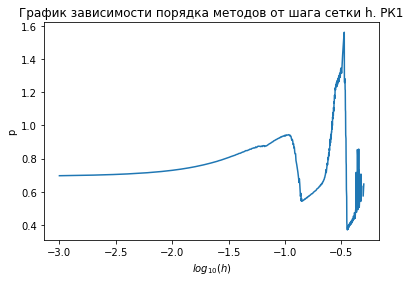

In [93]:
h = np.arange(0.001, 0.5, 0.001)
p1= []
for i in h:
    err_h = err(i)
    err_h2 = err(i/2)
    p_RK1 = np.log((err_h[0][0]+err_h[0][1])/(err_h2[0][0]+err_h2[0][1]))
    p1.append(p_RK1)
plt.title('График зависимости порядка методов от шага сетки h. РК1')
plt.plot(np.log10(h), p1)
plt.xlabel('$log_{10}(h)$')
plt.ylabel('p')

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'p')

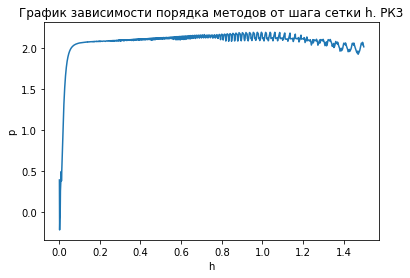

In [104]:
h = np.arange(0.001, 1.5, 0.001)
p3= []
for i in h:
    err_h = err(i)
    err_h2 = err(i/2)
    p_RK3 = np.log((err_h[1][0]+err_h[1][1])/(err_h2[1][0]+err_h2[1][1]))
    p3.append(p_RK3)
plt.title('График зависимости порядка методов от шага сетки h. РК3')
plt.plot(h, p3)
plt.xlabel('h')
plt.ylabel('p')

На графиках видно, что в "рабочей" зоне порядок метода остается постоянным, что и ожидалось, а силу роста h - порядок метода начинает меняться.